# GSAS-II: Quantitative Phase Analysis
We will calculate the weight fraction from three different phases in a Powder Diffraction Data

#### Import modules

In [1]:
%matplotlib inline
import G2script as G2
import matplotlib.pyplot as plt

setting up GSASIIscriptable from /home/edgar/work/g2home
Python gitpython module not installed
GSAS-II binary directory: /home/edgar/work/g2home/bindist


#### Create the project as object and save it as a .gpx object

In [2]:
gpx = G2.G2Project(newgpx='projects/gsas_qpa.gpx')
gpx.save()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx


#### We add three phases from .cif files into the project

In [3]:
al2o3 = gpx.add_phase(phasefile='cif/Al2O3.cif', phasename='alo')
zno = gpx.add_phase(phasefile='cif/ZnO.cif', phasename='zno')
caf2 = gpx.add_phase(phasefile='cif/CaF2.cif', phasename='caf')

/home/edgar/work/gsasii_tutorials/cif/Al2O3.cif read by Reader CIF
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
/home/edgar/work/gsasii_tutorials/cif/ZnO.cif read by Reader CIF
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
/home/edgar/work/gsasii_tutorials/cif/CaF2.cif read by Reader CIF
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx


#### Add the experimental diffraction data to the project as a histogram

In [4]:
hist = gpx.add_powder_histogram(datafile='diff_data/cpd-1h.prn', iparams='cuka.instprm')

/home/edgar/work/gsasii_tutorials/diff_data/cpd-1h.prn
Skipping header line     5.000       158

Skipping header line     5.020       174

Skipping header line     5.040       174

GSAS powder data scan error: no BANK records
/home/edgar/work/gsasii_tutorials/diff_data/cpd-1h.prn read by Reader Topas xye or 2th Fit2D chi
Instrument parameters read: /home/edgar/work/gsasii_tutorials/cuka.instprm (G2 fmt) bank None


1:3: Trying to find one of END, data_heading
>     5.000       158
>     ^
1:3: Trying to find one of END, data_heading
>     5.000       158
>     ^


#### For the moment, the histogram only contains observed (experimental) data, the calculated intensity is zero

In [5]:
tth = hist.getdata('X')
intensity_obs = hist.getdata('Yobs')
intensity_calc = hist.getdata('Ycalc')

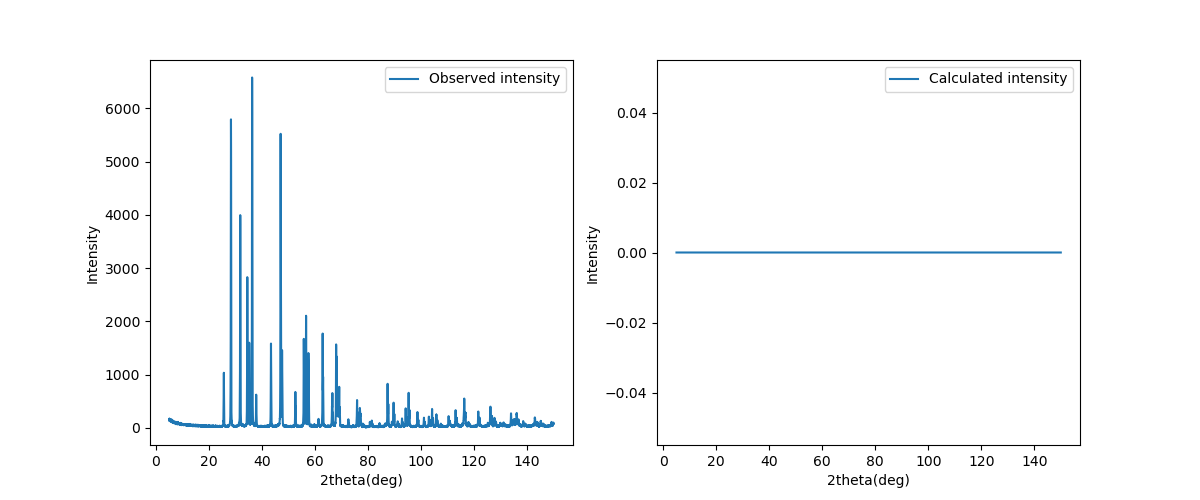

In [6]:
%matplotlib widget
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
INTS = [intensity_obs, intensity_calc]
LABELS = ['Observed intensity', 'Calculated intensity']
for ind in range(len(INTS)):
    axes[ind].plot(tth, INTS[ind], label=LABELS[ind])
    axes[ind].set_xlabel('2theta(deg)')
    axes[ind].set_ylabel('Intensity')
    axes[ind].legend()

#### Link the phases with the histogram

In [7]:
for phase in [zno, al2o3, caf2]:
    gpx.link_histogram_phase(phase=phase, histogram=hist)

#### Do the first refinement to simulate powder diffraction from the phases

In [8]:
gpx.do_refinements()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 8.0151e+05 with 7251 obs.
Cycle 0: 0.10s, Chi**2: 4.1385e+05 for 7251 obs., Lambda: 0,  Delta: 0.484, SVD=0
Cycle 1: 0.10s, Chi**2: 4.1385e+05 for 7251 obs., Lambda: 0,  Delta: 1.1e-09, SVD=0
converged
Maximum shift/esd = 82.409 for all cycles
Read from file:/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.bak0.gpx
Save to file  :/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
GPX file save successful
 Refinement results are in file: /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.lst
 ***** Refinement successful *****


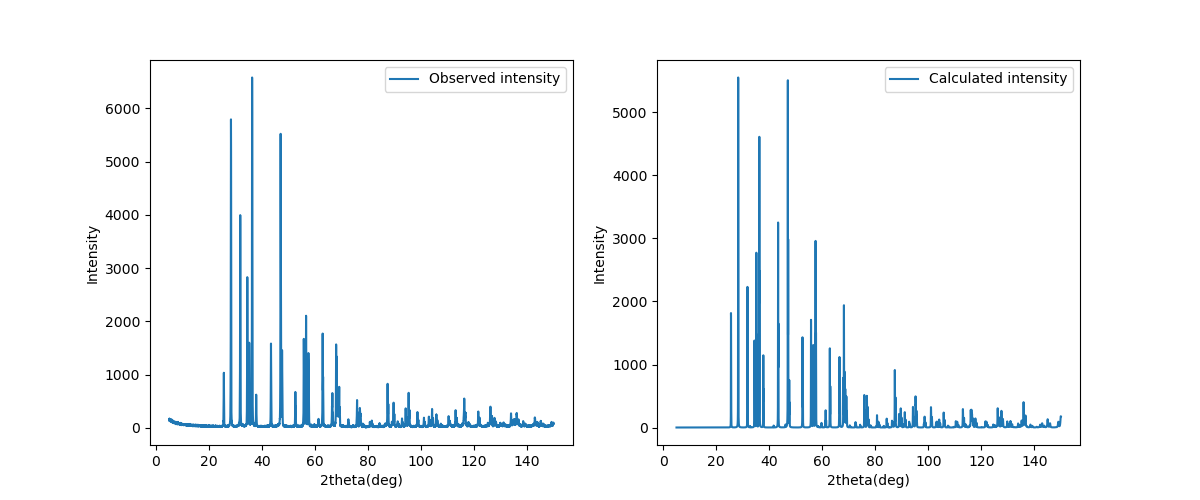

In [9]:
%matplotlib widget
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
INTS = [hist.getdata('Yobs'), hist.getdata('Ycalc')]
LABELS = ['Observed intensity', 'Calculated intensity']
for ind in range(len(INTS)):
    axes[ind].plot(hist.getdata('X'), INTS[ind], label=LABELS[ind])
    axes[ind].set_xlabel('2theta(deg)')
    axes[ind].set_ylabel('Intensity')
    axes[ind].legend()

#### To adjust the weight fractions of the components, first we will fit a background function
Check notebook: GSASII_background.ipynb

##### We can check the background function is still empty

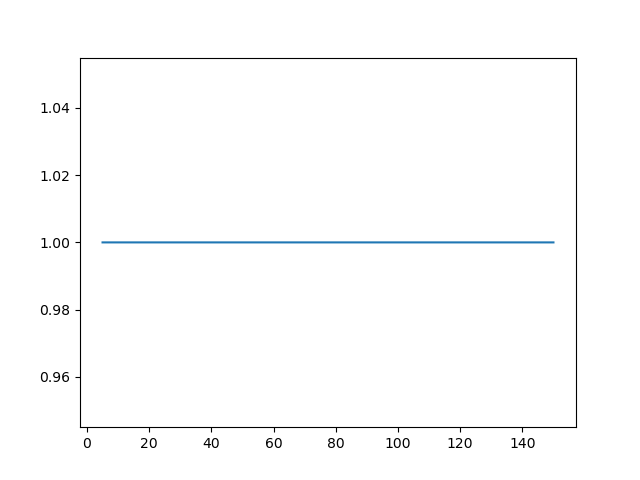

In [10]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(hist.getdata('X'), hist.getdata('Background'))
pass

#### Define some coefficients to adjust the background function and refine

In [11]:
background_refinement = {
    "Background" : {
        "no. coeffs" : 10,
        "type" : "chebyschev-1",
        "refine" : True,
    }
}

#### The background parameters are set at the level of the histogram

In [12]:
hist.set_refinements(background_refinement)

In [13]:
gpx.do_refinements()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
 Hessian Levenberg-Marquardt SVD refinement on 11 variables:
initial chi^2 4.1385e+05 with 7251 obs.
Cycle 0: 0.11s, Chi**2: 2.247e+05 for 7251 obs., Lambda: 0,  Delta: 0.457, SVD=0
Cycle 1: 0.11s, Chi**2: 2.247e+05 for 7251 obs., Lambda: 0,  Delta: 1.52e-08, SVD=0
converged
Maximum shift/esd = 60.100 for all cycles
Read from file:/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.bak0.gpx
Save to file  :/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
GPX file save successful
 Refinement results are in file: /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.lst
 ***** Refinement successful *****


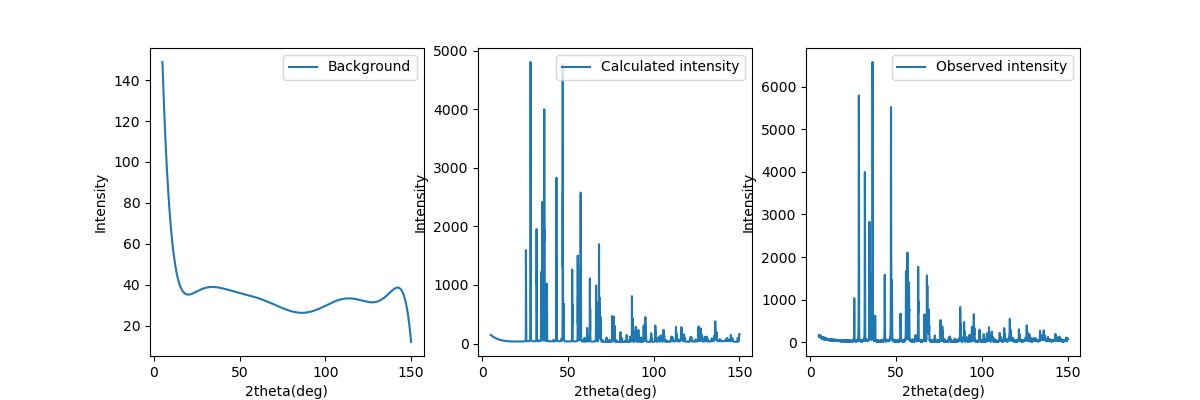

In [14]:
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
INTS = [hist.getdata('Background'), hist.getdata('Ycalc'), hist.getdata('Yobs')]
LABELS = ['Background', 'Calculated intensity', 'Observed intensity']
for ind in range(len(INTS)):
    axes[ind].plot(hist.getdata('X'), INTS[ind], label=LABELS[ind])
    axes[ind].set_xlabel('2theta(deg)')
    axes[ind].set_ylabel('Intensity')
    axes[ind].legend()

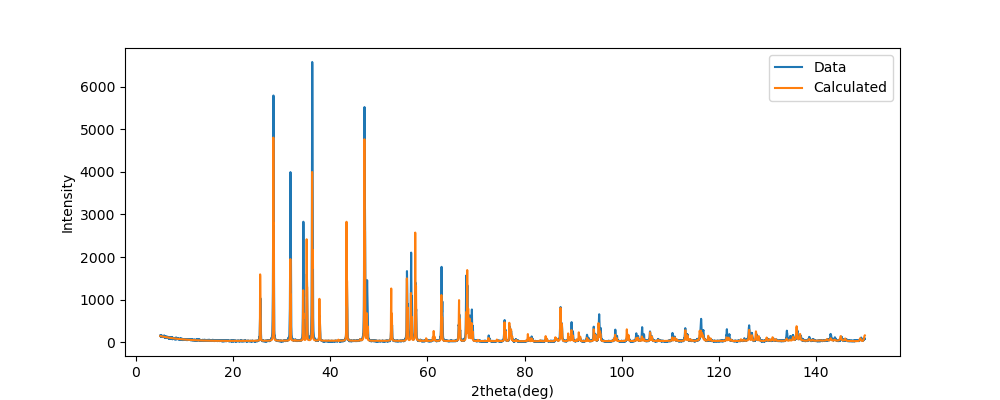

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(hist.getdata('X'), hist.getdata('Yobs'), label="Data")
ax.plot(hist.getdata('X'), hist.getdata('Ycalc'), label="Calculated")
ax.set_xlabel('2theta(deg)')
ax.set_ylabel('Intensity')
ax.legend()
pass

#### Now the project is refining the background, we will refine parameters from the phases

In [16]:
for ind, phase in enumerate(gpx.phases()):
    scale = phase.data['Histograms']['PWDR cpd-1h.prn']['Scale'][0]
    weight_fraction = gpx.data['Covariance']['data']['depSigDict'][f'{int(ind)}:0:WgtFrac'][0]
    # print(f"The scale factor of {phase.name} is {scale}")
    print(f"The weight fraction of {phase.name} is {weight_fraction:.3f}")

The weight fraction of alo is 0.563
The weight fraction of zno is 0.150
The weight fraction of caf is 0.287


#### To do that, we will refine the following parameters

In [17]:
limits = {'Limits' : [0,100]}
param_lebail = {"LeBail" : True}
param_cell = {'Cell' : True, "LeBail" : False}
params_instr = {'Instrument Parameters' : ['U', 'V', 'W', 'X', 'Y', 'Z']}
param_fraction = {"Scale" : True, "Use" : True}

#### To see the levels of refinement, check the confluence page: ???

# 

## 1) First, we will refine step by step

##### The limits are set at the level of histogram

In [18]:
hist.set_refinements(limits)

In [19]:
al2o3.get_cell()

{'length_a': 4.7605,
 'length_b': 4.7605,
 'length_c': 12.9956,
 'angle_alpha': 90.0,
 'angle_beta': 90.0,
 'angle_gamma': 120.0,
 'volume': 255.05398073017125}

##### The LeBail refinement are set for the phases

In [20]:
al2o3.set_refinements(param_lebail)
caf2.set_refinements(param_lebail)
zno.set_refinements(param_lebail)

##### First refinement

In [21]:
gpx.do_refinements()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
 Hessian Levenberg-Marquardt SVD refinement on 11 variables:
initial chi^2 1.9894e+05 with 4751 obs.
Cycle 0: 0.06s, Chi**2: 1.5248e+05 for 4751 obs., Lambda: 0,  Delta: 0.234, SVD=0
Cycle 1: 0.06s, Chi**2: 1.0695e+05 for 4751 obs., Lambda: 0,  Delta: 0.299, SVD=0
divergence: chi^2 1.473e+05 on 4751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e-03
divergence: chi^2 1.4729e+05 on 4751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e-02
divergence: chi^2 1.4716e+05 on 4751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e-01
divergence: chi^2 1.4597e+05 on 4751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e+00
divergence: chi^2 1.4036e+05 on 4751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e+01
divergence: chi^2 1.3523e+05 on 4751 obs. (0 SVD zeros)
	increasing Marquardt lambda to 1.0e+02
ouch #4 stuck: chisq-new 1.352e+05 > chisq0 1.07e+05 with lambda 1e+02
Maximum shift/e

##### Now, we refine the parameters of the cell

In [22]:
al2o3.set_refinements(param_cell)
caf2.set_refinements(param_cell)
zno.set_refinements(param_cell)
gpx.do_refinements()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
 Hessian Levenberg-Marquardt SVD refinement on 16 variables:
initial chi^2 2.1123e+05 with 4751 obs.
Cycle 0: 0.06s, Chi**2: 1.6412e+05 for 4751 obs., Lambda: 0,  Delta: 0.223, SVD=0
Cycle 1: 0.06s, Chi**2: 1.5191e+05 for 4751 obs., Lambda: 0,  Delta: 0.0744, SVD=0
Cycle 2: 0.06s, Chi**2: 1.4742e+05 for 4751 obs., Lambda: 0,  Delta: 0.0296, SVD=0
Maximum shift/esd = 35.201 for all cycles
Read from file:/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.bak0.gpx
Save to file  :/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
GPX file save successful
 Refinement results are in file: /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.lst
 ***** Refinement successful *****


##### Now, the instrumental parameters are set at the level of histogram

In [23]:
hist.set_refinements(params_instr)

##### Finally, the scale of each phase is set at the level of Histogram & Phase (HAP)

In [24]:
al2o3.set_HAP_refinements(param_fraction)
caf2.set_HAP_refinements(param_fraction)
zno.set_HAP_refinements(param_fraction)

In [25]:
gpx.do_refinements()

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
 Hessian Levenberg-Marquardt SVD refinement on 25 variables:
initial chi^2 1.4741e+05 with 4751 obs.
Cycle 0: 0.06s, Chi**2: 20488 for 4751 obs., Lambda: 0,  Delta: 0.861, SVD=1
Cycle 1: 0.06s, Chi**2: 15056 for 4751 obs., Lambda: 0,  Delta: 0.265, SVD=1
Cycle 2: 0.07s, Chi**2: 14494 for 4751 obs., Lambda: 0,  Delta: 0.0373, SVD=1
Maximum shift/esd = 172.337 for all cycles
SVD problem(s) likely from:
  :0:Scale
Note highly correlated parameters:
 ** :0:X and :0:Z (@99.91%)
Read from file:/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.bak0.gpx
Save to file  :/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
GPX file save successful
 Refinement results are in file: /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.lst
 ***** Refinement successful *****
Reported from refinement:
SVD problem(s) likely from:
:0:Scale
Note highly correlated parameters:
 ** :0:X and :0:Z (@99.91%)


##### So, we can get a good approximation of the relative weight fractions

In [26]:
for ind, phase in enumerate(gpx.phases()):
    scale = phase.data['Histograms']['PWDR cpd-1h.prn']['Scale'][0]
    weight_fraction = gpx.data['Covariance']['data']['depSigDict'][f'{int(ind)}:0:WgtFrac'][0]
    print(f"The weight fraction of {phase.name} is {weight_fraction:.3f}")

The weight fraction of alo is 0.348
The weight fraction of zno is 0.297
The weight fraction of caf is 0.355


## 2) The other option is to define the whole refinement procedure and run it at once

In [27]:
gpx = G2.G2Project(newgpx='projects/gsas_qpa.gpx')
gpx.save()
al2o3 = gpx.add_phase(
    phasefile='cif/Al2O3.cif', 
    phasename='alo',
)
zno = gpx.add_phase(
    phasefile='cif/ZnO.cif', 
    phasename='zno',
)
caf2 = gpx.add_phase(
    phasefile='cif/CaF2.cif', 
    phasename='caf',
)

hist = gpx.add_powder_histogram(
    datafile='diff_data/cpd-1h.prn', 
    iparams='cuka.instprm',
    phases=[al2o3, zno, caf2,],
)

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
/home/edgar/work/gsasii_tutorials/cif/Al2O3.cif read by Reader CIF
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
/home/edgar/work/gsasii_tutorials/cif/ZnO.cif read by Reader CIF
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
/home/edgar/work/gsasii_tutorials/cif/CaF2.cif read by Reader CIF
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
/home/edgar/work/gsasii_tutorials/diff_data/cpd-1h.prn
Skipping header line     5.000       158

Skipping header line     5.020       174

Skipping header line     5.040       174

GSAS powder data scan error: no BANK records
/home/edgar/work/gsasii_tutorials/diff_data/cpd-1h.prn read by Reader Topas xye or 2th Fit2D chi
Instrument parameters read: /home/edgar/work/gsasii_tutorials/cuka.instprm (G2 fmt) bank None


1:3: Trying to find one of END, data_heading
>     5.000       158
>     ^
1:3: Trying to find one of END, data_heading
>     5.000       158
>     ^


In [28]:
background_refinement = {
    "Background" : {
        "no. coeffs" : 10,
        "type" : "chebyschev-1",
        "refine" : True,
    }
}

In [29]:
ref_list = [
    {"set" : background_refinement},
    {"set" : limits},
    {"set" : param_lebail},
    {"set" : param_cell},
    {"set" : params_instr},
    {"set" : param_fraction},
]
# hist.set_peakFlags(
#     peaklist=None, #apply to all peaks
#     area=True, #Area
#     pos=True, # x-position
#     sig=True, #Gaussian width
#     gam=True, #Lorentzian width
# )

In [30]:
gpx.do_refinements(ref_list)

gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
 Hessian Levenberg-Marquardt SVD refinement on 11 variables:
initial chi^2 8.0151e+05 with 7251 obs.
Cycle 0: 0.11s, Chi**2: 2.247e+05 for 7251 obs., Lambda: 0,  Delta: 0.72, SVD=0
Cycle 1: 0.11s, Chi**2: 2.247e+05 for 7251 obs., Lambda: 0,  Delta: -2.82e-09, SVD=0
converged
Maximum shift/esd = 92.240 for all cycles
Read from file:/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.bak0.gpx
Save to file  :/home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
GPX file save successful
 Refinement results are in file: /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.lst
 ***** Refinement successful *****
gpx file saved as /home/edgar/work/gsasii_tutorials/projects/gsas_qpa.gpx
 Hessian Levenberg-Marquardt SVD refinement on 11 variables:
initial chi^2 1.9896e+05 with 4751 obs.
Cycle 0: 0.06s, Chi**2: 1.9298e+05 for 4751 obs., Lambda: 0,  Delta: 0.03, SVD=0
Cycle 1: 0.06s, Chi**2: 1.9298e+05 for 4751 obs., Lambda

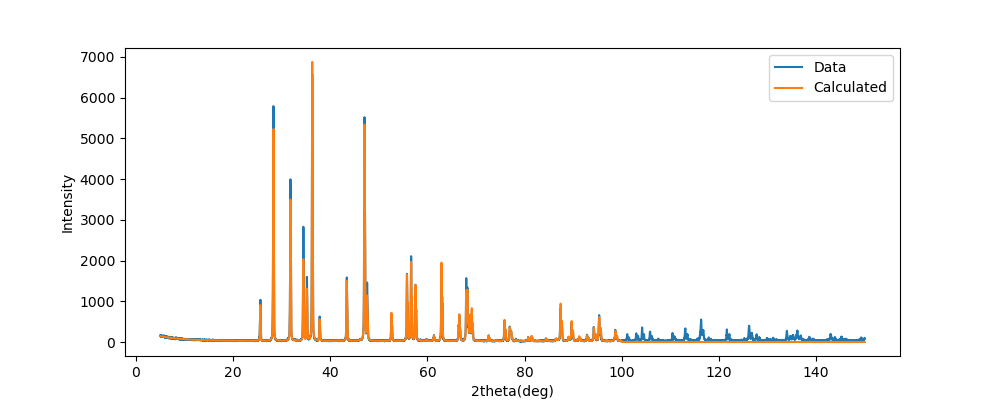

In [31]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(hist.getdata('X'), hist.getdata('Yobs'), label="Data")
ax.plot(hist.getdata('X'), hist.getdata('Ycalc'), label="Calculated")
ax.set_xlabel('2theta(deg)')
ax.set_ylabel('Intensity')
ax.legend()
pass

#### Check that the relative weight fractions are well calculated

In [32]:
for ind, phase in enumerate(gpx.phases()):
    scale = phase.data['Histograms']['PWDR cpd-1h.prn']['Scale'][0]
    weight_fraction = gpx.data['Covariance']['data']['depSigDict'][f'{int(ind)}:0:WgtFrac'][0]
    print(f"The weight fraction of {phase.name} is {weight_fraction:.3f}")

The weight fraction of alo is 0.348
The weight fraction of zno is 0.297
The weight fraction of caf is 0.355
